**Non-AI Approach: Using OpenCV**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing 20240713_193907.jpg from Dataset 1
Number of items detected: 2449


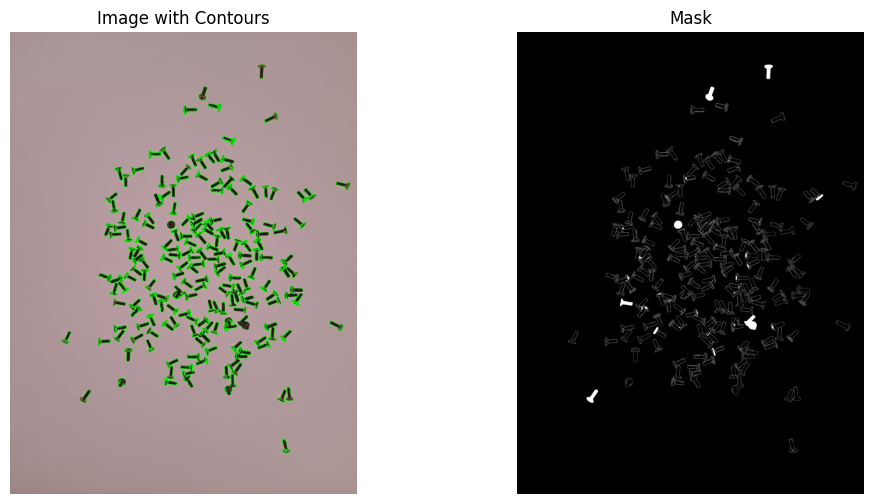

Processing 20240713_194256.jpg from Dataset 1
Number of items detected: 665


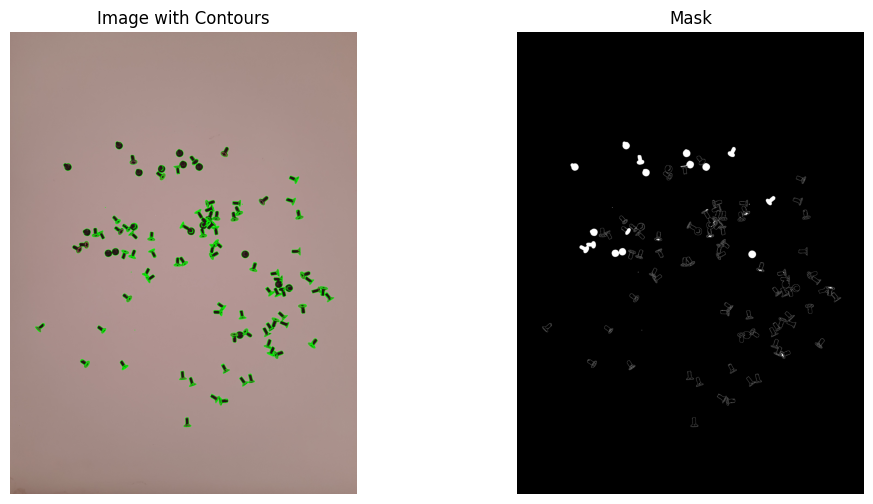

Processing 20240713_194606.jpg from Dataset 1
Number of items detected: 1084


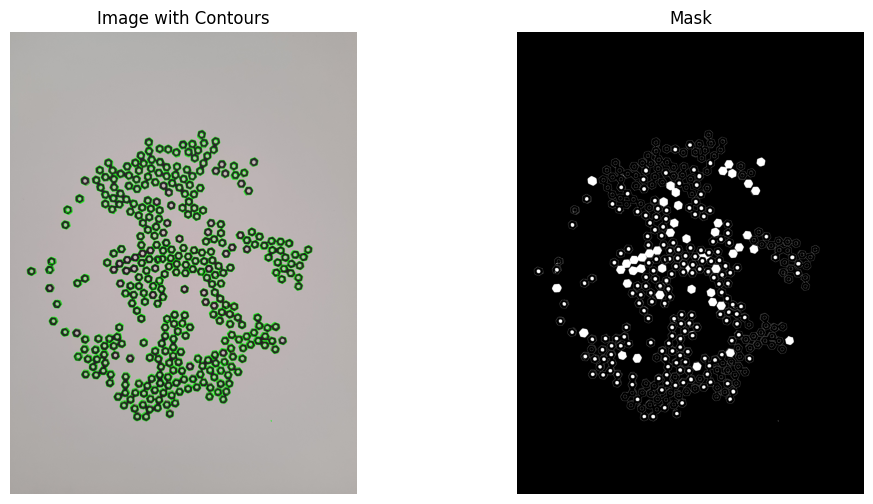

Processing 20240713_194232.jpg from Dataset 1
Number of items detected: 823


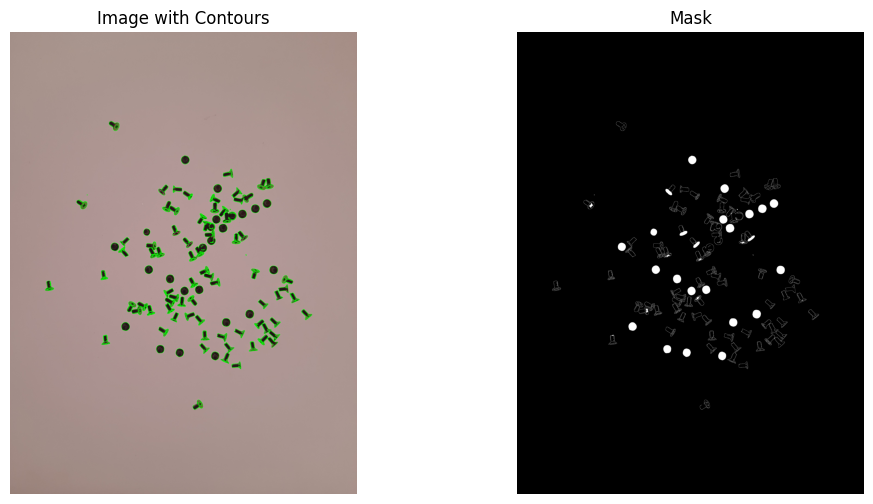

Processing 20240713_194621.jpg from Dataset 1
Number of items detected: 1046


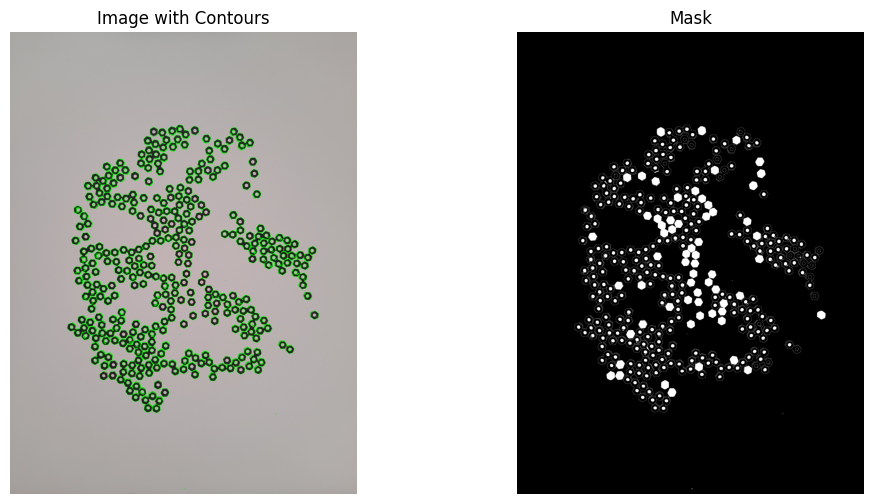

Processing 20240713_193839.jpg from Dataset 1
Number of items detected: 2984


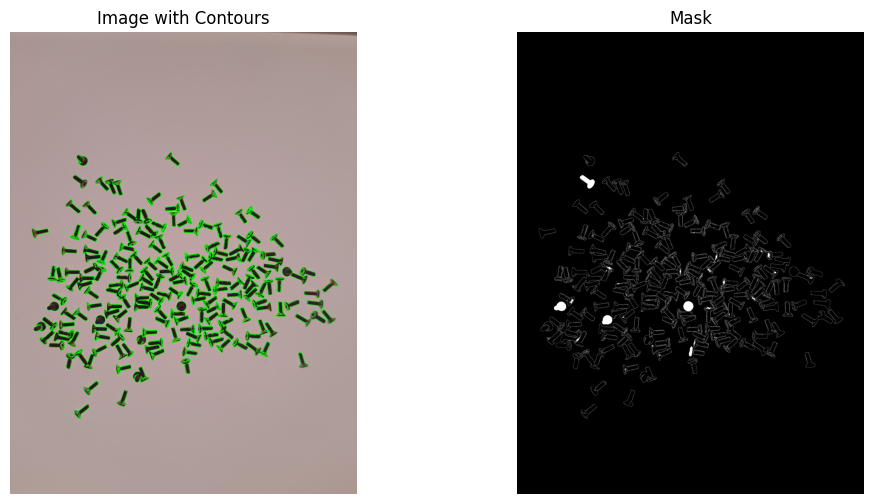

Processing 20240713_193650.jpg from Dataset 1
Number of items detected: 164


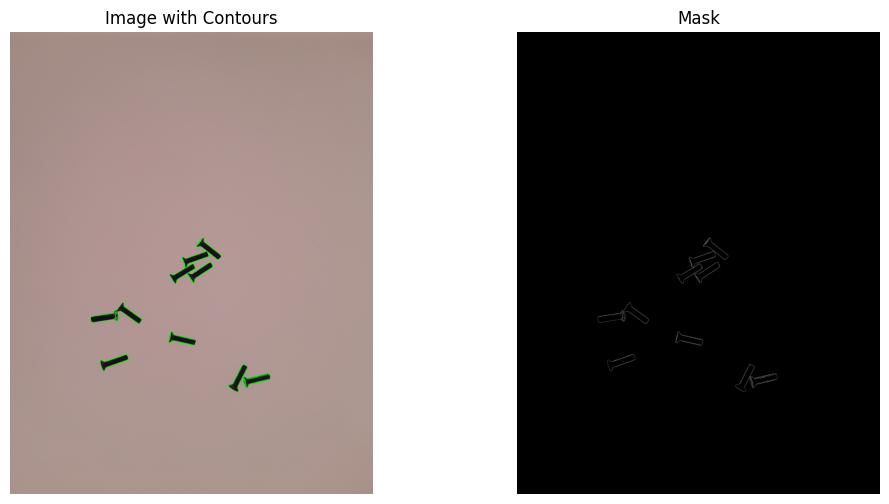

Processing 20240713_194630.jpg from Dataset 1
Number of items detected: 938


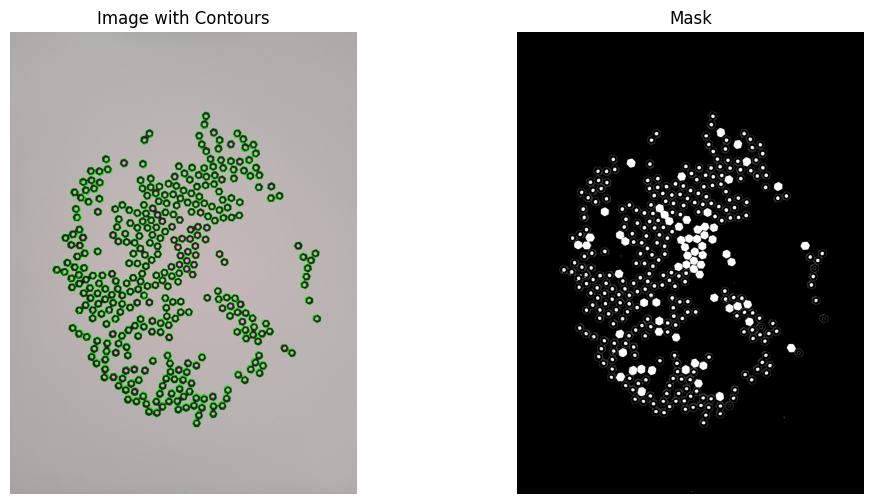

Processing 20240713_193659.jpg from Dataset 1
Number of items detected: 177


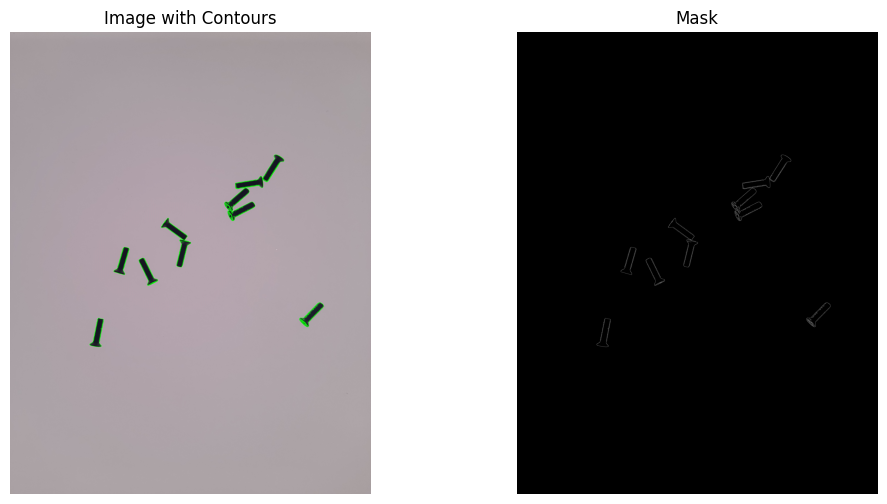

Processing 20240713_194316.jpg from Dataset 1
Number of items detected: 680


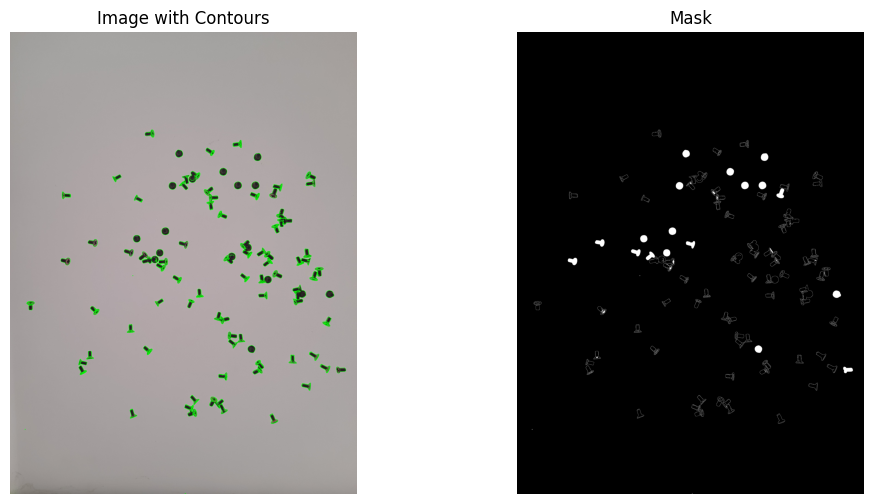

Processing 20240713_194200.jpg from Dataset 1
Number of items detected: 727


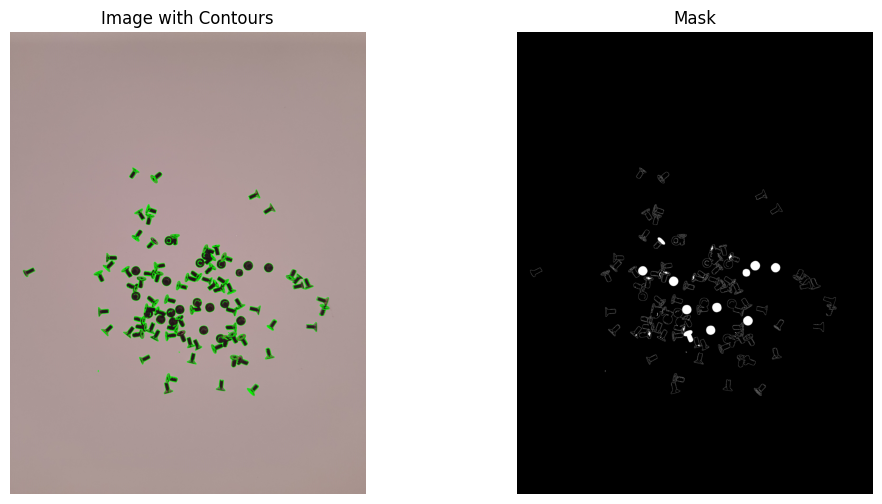

Processing 20240713_192951.jpg from Dataset 1
Number of items detected: 457


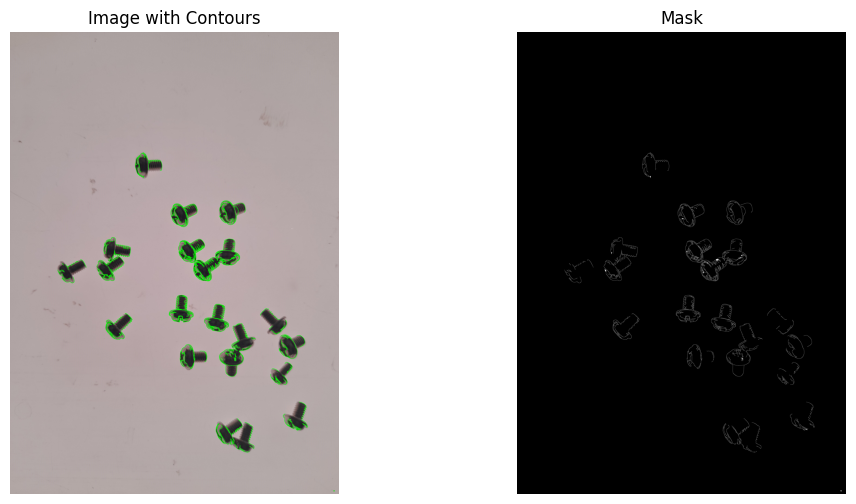

Processing 20240713_194551.jpg from Dataset 1
Number of items detected: 1116


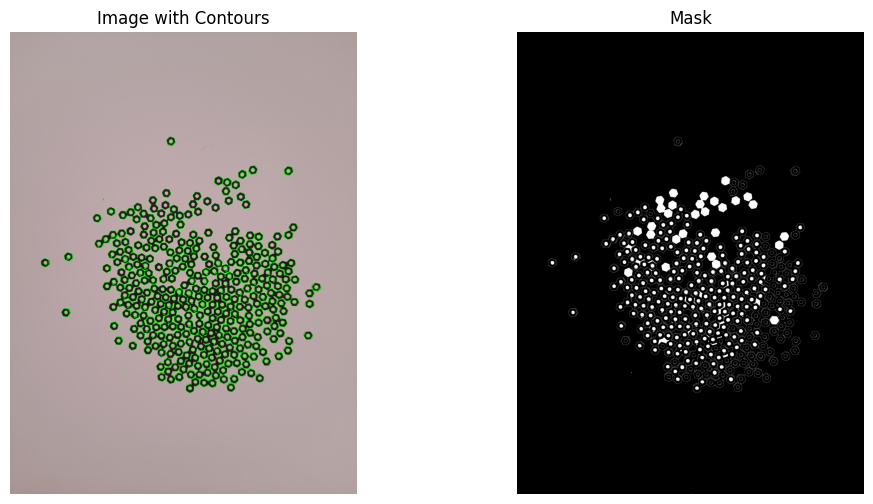

Processing 20240713_194215.jpg from Dataset 1
Number of items detected: 692


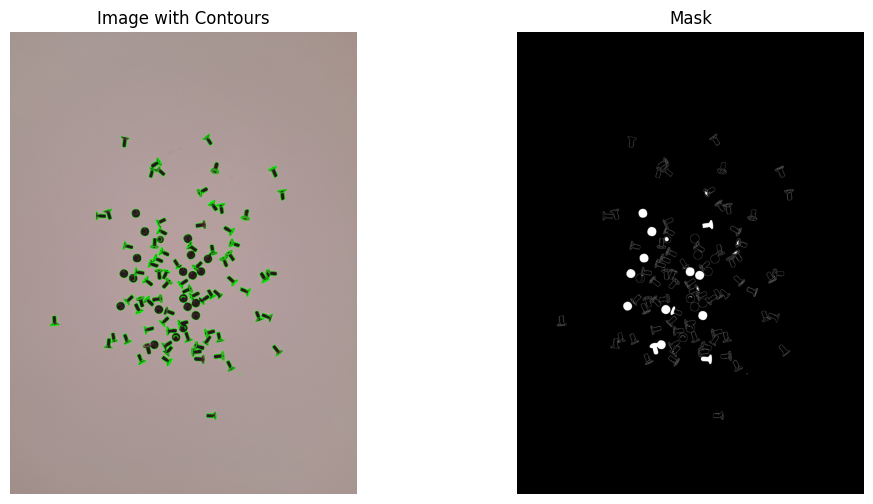

Processing 20240713_193831.jpg from Dataset 1
Number of items detected: 3095


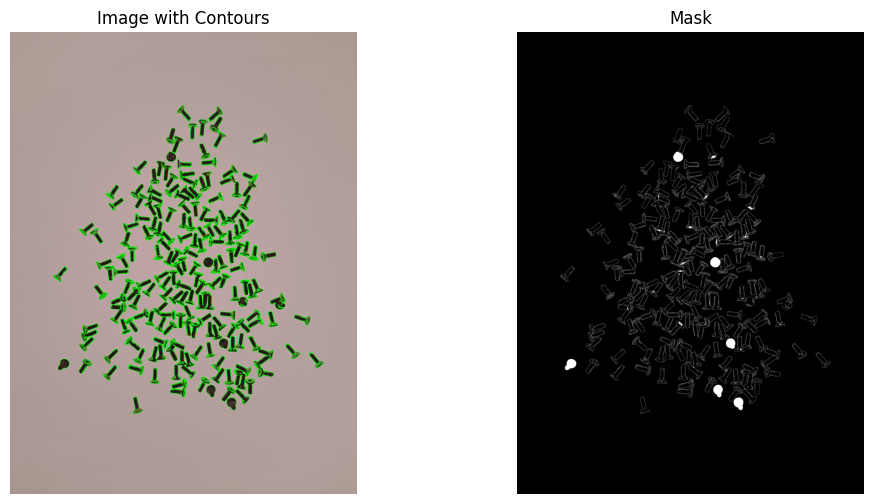

Processing 20240713_193135.jpg from Dataset 1
Number of items detected: 615


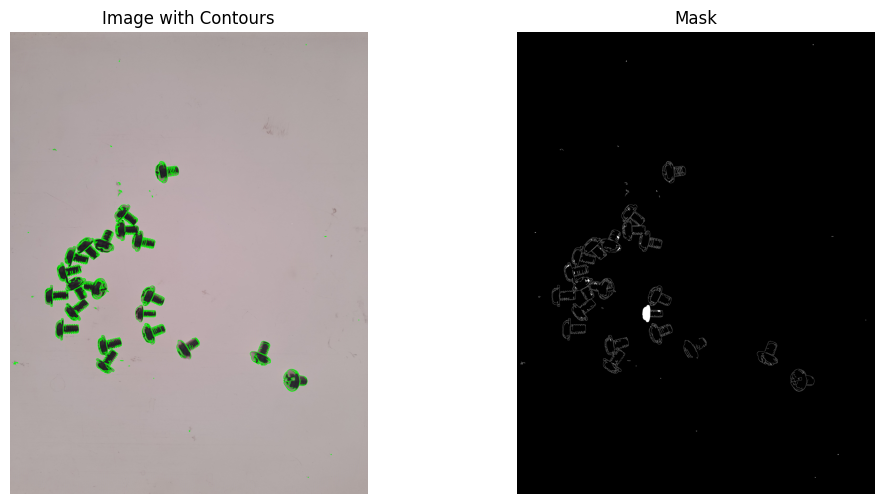

Processing 20240713_194206.jpg from Dataset 1
Number of items detected: 838


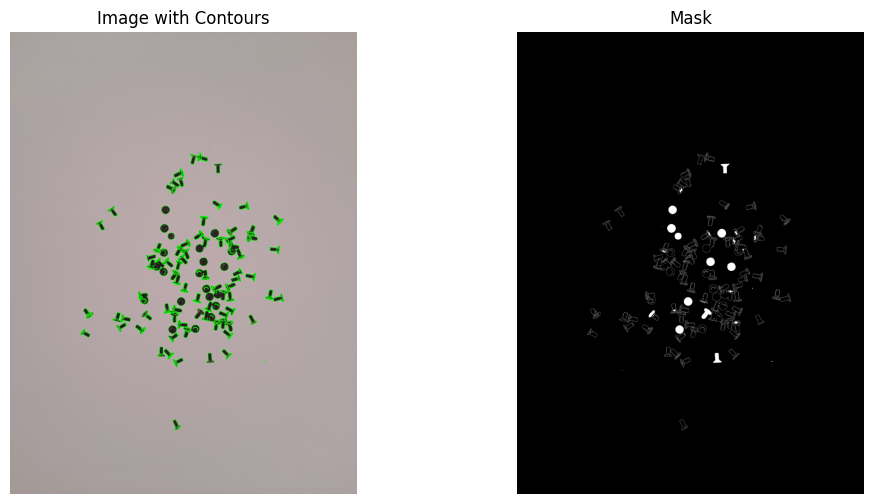

Processing 20240713_194541.jpg from Dataset 1
Number of items detected: 1175


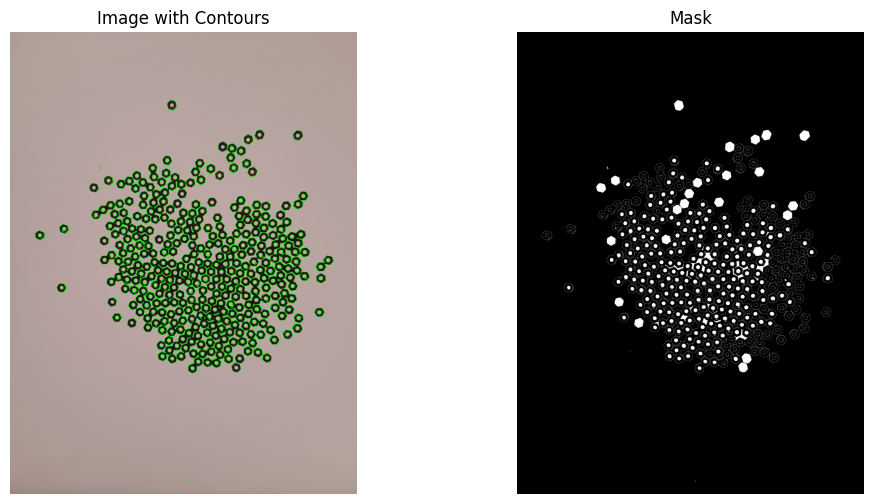

Processing img6.jpg from Dataset 2
Number of items detected: 137


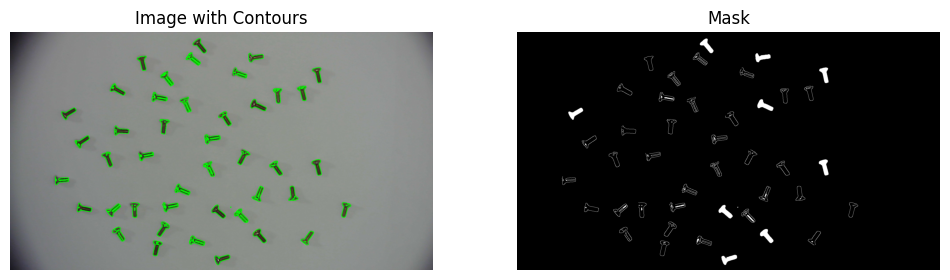

Processing img3.jpg from Dataset 2
Number of items detected: 150


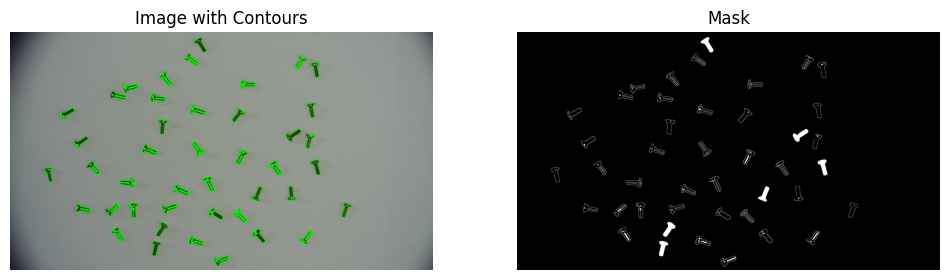

Processing img1_43_nosy.jpg from Dataset 2
Number of items detected: 142


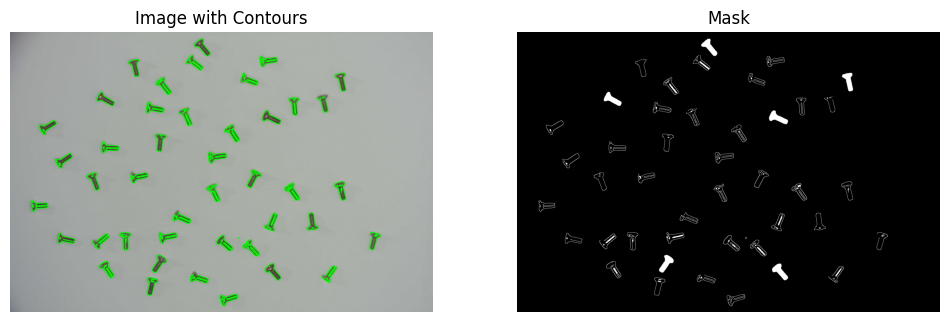

Processing img5.jpg from Dataset 2
Number of items detected: 117


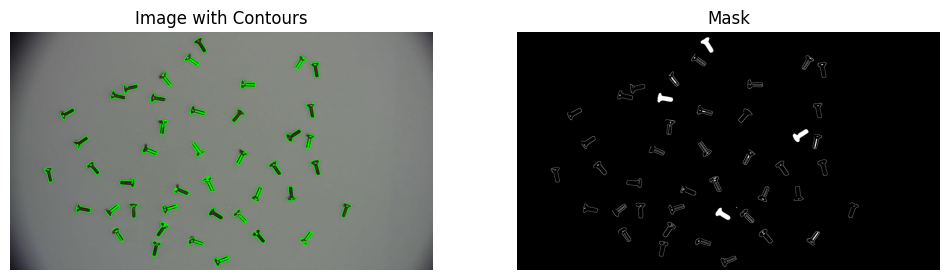

Processing img4.jpg from Dataset 2
Number of items detected: 107


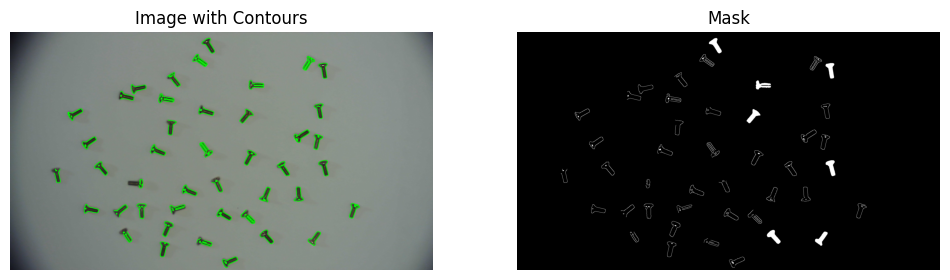

Processing img1.jpg from Dataset 2
Number of items detected: 140


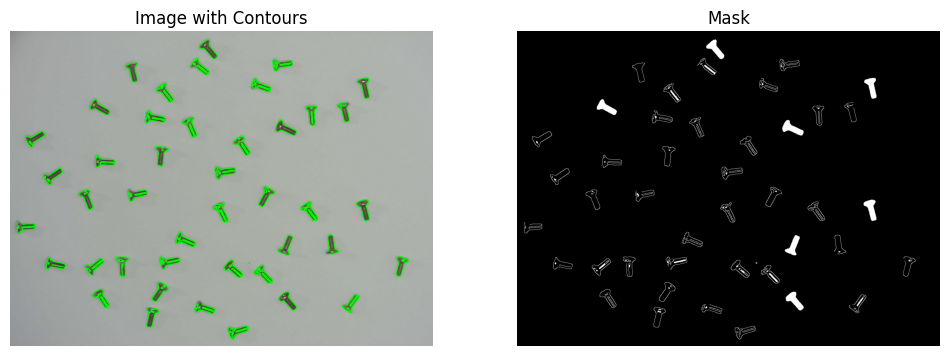

Processing img2.jpg from Dataset 2
Number of items detected: 150


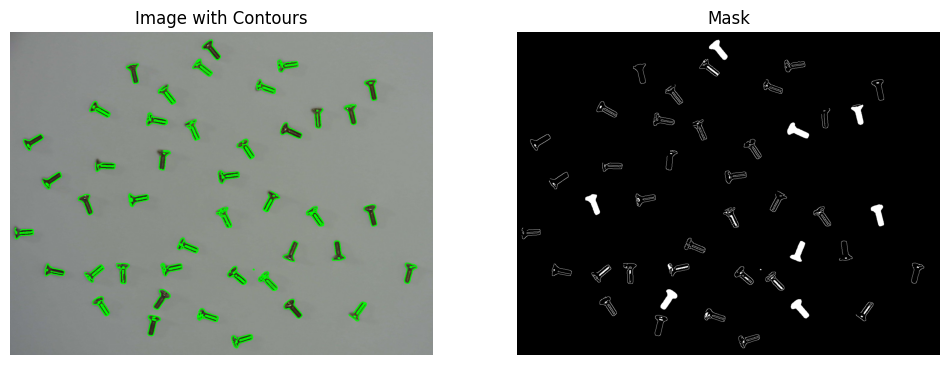

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Path to datasets
dataset_1_path = "/content/drive/MyDrive/ScrewAndBolt_20240713"
dataset_2_path = "/content/drive/MyDrive/Screws_2024_07_15"

# Placeholder dictionary for ground truth counts (example format: {'image_name': count})
# Replace with actual ground truth counts
ground_truth_counts = {
    'image1.jpg': 10,  # Example entries
    'image2.jpg': 15,
    # Add ground truth counts for all images
}

def count_items_and_overlay_masks(image_path, ground_truth):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edged = cv2.Canny(blurred, 30, 150)  # Adjust thresholds for better edge detection

    # Find contours from the edges
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy of the original image
    image_with_contours = image.copy()
    for contour in contours:
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)

    # Create a mask for overlay
    mask = np.zeros_like(image)
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)  # Fill the contours in mask

    # Count the number of items
    num_items = len(contours)
    print(f"Number of items detected: {num_items}")

    # Calculate accuracy if ground truth is provided
    if ground_truth is not None:
        accuracy = min(num_items, ground_truth) / max(num_items, ground_truth) * 100
        print(f"Accuracy: {accuracy:.2f}%")
        if accuracy > 95:
            print("Accuracy is above 95%")

    # Display the image with contours and the mask
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Image with Contours')
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Mask')
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Process each image in the datasets
for image_name in os.listdir(dataset_1_path):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        print(f"Processing {image_name} from Dataset 1")
        ground_truth = ground_truth_counts.get(image_name, None)
        count_items_and_overlay_masks(os.path.join(dataset_1_path, image_name), ground_truth)

for image_name in os.listdir(dataset_2_path):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        print(f"Processing {image_name} from Dataset 2")
        ground_truth = ground_truth_counts.get(image_name, None)
        count_items_and_overlay_masks(os.path.join(dataset_2_path, image_name), ground_truth)
